In [1]:
### Final Project
# Evan Young

### Import libraries and packages

import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data for analysis

cdc = pd.read_csv('/Users/evanyoung/Desktop/Academic/Unleashing Open Data with Python/0_final_project/indicators_cdc.csv')

In [3]:
# Turn date values in Time Period Start Date into a useable format

def conv_dates_series(df, col, old_date_format, new_date_format):

    df[col] = pd.to_datetime(df[col], format=old_date_format).dt.strftime(new_date_format)
    
    return df

# Set ideal formatting for time period for sorting and inclusion in visualizations

old_date_format='%m/%d/%Y'
new_date_format='%y-%m-%d'

conv_dates_series(cdc, "Time Period Start Date", old_date_format, new_date_format)


# General summary statistics by depression, anxiety, and depression + anxiety

anxiety = cdc[(cdc.Indicator=='Symptoms of Anxiety Disorder')]
anxiety.describe()

,Time Period,Value,Low CI,High CI
count,3228.000000,3102.000000,3102.000000,3102.000000
mean,21.620818,35.074855,31.266699,39.063475
std,12.959663,7.135410,7.158479,7.397698
min,1.000000,9.700000,7.700000,12.100000
25%,10.000000,30.600000,26.600000,34.500000
50%,22.000000,34.700000,30.800000,38.800000
75%,33.000000,39.300000,35.400000,43.400000
max,43.000000,72.200000,63.500000,80.200000


In [4]:
depression = cdc[(cdc.Indicator=='Symptoms of Depressive Disorder')]
depression.describe()

,Time Period,Value,Low CI,High CI
count,3228.000000,3102.000000,3102.000000,3102.000000
mean,21.620818,24.578820,21.108349,28.373146
std,12.959663,5.884763,5.748295,6.347260
min,1.000000,6.400000,5.100000,7.900000
25%,10.000000,20.800000,17.300000,24.400000
50%,22.000000,24.100000,20.600000,27.900000
75%,33.000000,27.700000,24.300000,31.800000
max,43.000000,60.800000,51.200000,72.200000


In [5]:
anxiety_depression = cdc[(cdc.Indicator=='Symptoms of Anxiety Disorder or Depressive Disorder')]
anxiety_depression.describe()

,Time Period,Value,Low CI,High CI
count,3228.000000,3102.000000,3102.000000,3102.000000
mean,21.620818,35.074855,31.266699,39.063475
std,12.959663,7.135410,7.158479,7.397698
min,1.000000,9.700000,7.700000,12.100000
25%,10.000000,30.600000,26.600000,34.500000
50%,22.000000,34.700000,30.800000,38.800000
75%,33.000000,39.300000,35.400000,43.400000
max,43.000000,72.200000,63.500000,80.200000


In [6]:
#####################################################################################################################
# Figure 1 and 2: Summary of Symptoms at National Level
#####################################################################################################################

national = cdc[(cdc.Group=='National Estimate')]
national = national[national['Value'].notnull()]

national_grouped = national.groupby(by='Indicator')
national_grouped.Value.describe()


,count,mean,std,min,25%,50%,75%,max
Indicator,,,,,,,,
Symptoms of Anxiety Disorder,43.0,30.667442,3.656874,24.5,27.35,30.8,33.20,37.2
Symptoms of Anxiety Disorder or Depressive Disorder,43.0,35.444186,3.999185,29.0,31.85,35.9,38.35,42.6
Symptoms of Depressive Disorder,43.0,24.788372,2.715144,20.9,22.25,24.7,27.25,30.2


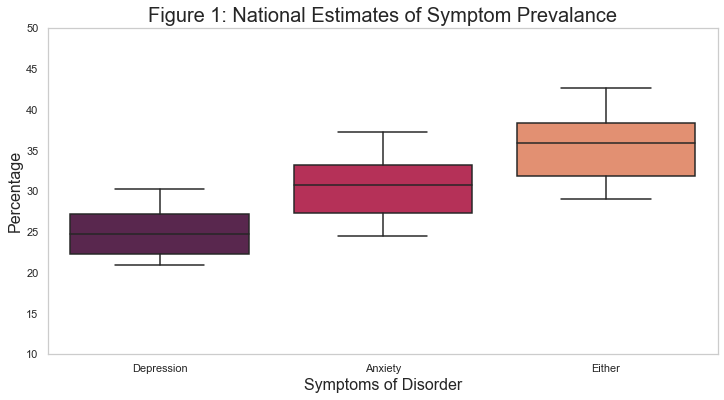

In [7]:
def recode_indicator(series):
    if series=='Symptoms of Anxiety Disorder':
        return 'Anxiety'
    elif series =='Symptoms of Depressive Disorder':
        return 'Depression'
    elif series=='Symptoms of Anxiety Disorder or Depressive Disorder':
        return 'Either'

national['Indicator']=national['Indicator'].apply(recode_indicator)

## Show distribution over the whole time frame

sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()
sns.boxplot(x="Indicator", y="Value", palette="rocket", data = national)

plt.title("Figure 1: National Estimates of Symptom Prevalance",fontsize = 20)
plt.xlabel("Symptoms of Disorder", fontsize = 16) 
plt.ylabel("Percentage", fontsize = 16)
ax.set_ylim(10, 50)


plt.show()

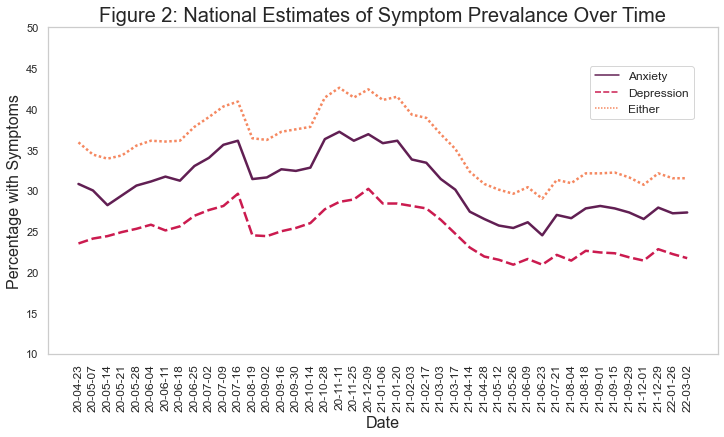

In [8]:
## Show the levels of national estimates over time

national_time = national.sort_values(by='Time Period Start Date')
national_time = national_time[['Value', 'Time Period Start Date', 'Indicator']]
national_time = national_time.pivot(index='Time Period Start Date',columns='Indicator',values='Value')

sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()
sns.lineplot(data=national_time, palette="rocket", linewidth=2.5)
plt.title("Figure 2: National Estimates of Symptom Prevalance Over Time", fontsize = 20)
plt.xlabel("Date", fontsize = 16) 
plt.ylabel("Percentage with Symptoms", fontsize = 16)
plt.legend(loc='center left', bbox_to_anchor=(.8, 0.8),fontsize=12)
plt.xticks(rotation=90,size = 12)
ax.set_ylim(10, 50)

plt.show()


/var/folders/sc/8b4zqk4d7014_l5d0lxytxp40000gp/T/ipykernel_65249/563157701.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anxiety_age['Subgroup']=anxiety_age['Subgroup'].apply(recode_age)
/var/folders/sc/8b4zqk4d7014_l5d0lxytxp40000gp/T/ipykernel_65249/563157701.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression_age['Subgroup']=depression_age['Subgroup'].apply(recode_age)


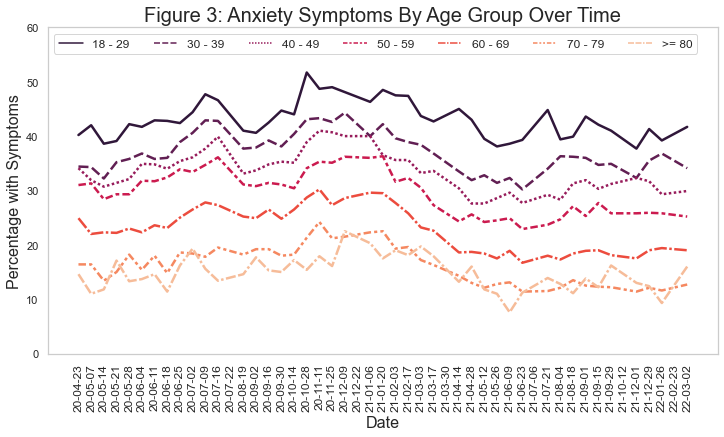

In [9]:
#####################################################################################################################
# Figures 3 and 4: By Age
#####################################################################################################################

### Anxiety Symptoms by Age in All of the United States

anxiety_age = cdc[(cdc.Indicator=='Symptoms of Anxiety Disorder') & (cdc.Group=='By Age')]

def recode_age(series):
    if series=='18 - 29 years':
        return '18 - 29'
    elif series =='30 - 39 years':
        return '30 - 39'
    elif series =='40 - 49 years':
        return '40 - 49'
    elif series =='50 - 59 years':
        return '50 - 59'
    elif series =='60 - 69 years':
        return '60 - 69'
    elif series =='70 - 79 years':
        return '70 - 79'
    elif series =='80 years and above':
        return '>= 80'

anxiety_age['Subgroup']=anxiety_age['Subgroup'].apply(recode_age)

# Group by Age Subgroup and summarize

anxiety_age_grouped = anxiety_age.groupby(by='Subgroup')
anxiety_age_grouped.Value.describe()

### Depression Symptoms by Age in All of the United States

depression_age = cdc[(cdc.Indicator=='Symptoms of Depressive Disorder') & (cdc.Group=='By Age')]
depression_age['Subgroup']=depression_age['Subgroup'].apply(recode_age)

# Group by Age Subgroup and summarize

depression_age_grouped = depression_age.groupby(by='Subgroup')
depression_age_grouped.Value.describe()

#### Show anxiety levels over time by age group

anxiety_age = anxiety_age.sort_values(by='Time Period Start Date')

anxiety_age_time = anxiety_age[['Value', 'Time Period Start Date', 'Subgroup']]

anxiety_age_time = anxiety_age_time.pivot(index='Time Period Start Date',columns='Subgroup',values='Value')

sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()
sns.lineplot(data=anxiety_age_time, palette="rocket", linewidth=2.5)
plt.title("Figure 3: Anxiety Symptoms By Age Group Over Time", fontsize = 20)
plt.xlabel("Date", fontsize = 16) 
plt.ylabel("Percentage with Symptoms", fontsize = 16)
plt.legend(loc='center left', bbox_to_anchor=(0, .95),ncol=len(anxiety_age_time.columns), fontsize=12)
plt.xticks(rotation=90,size = 12)
ax.set_ylim(0, 60)

plt.show()

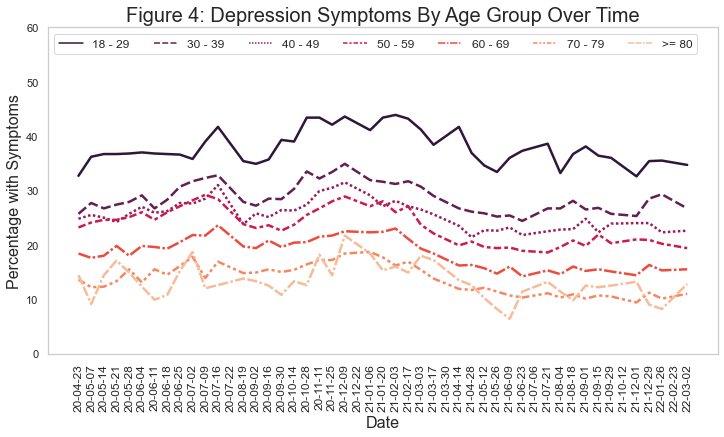

In [10]:
#### Show depression levels over time by age group

depression_age = depression_age.sort_values(by='Time Period Start Date')

depression_age_time = depression_age[['Value', 'Time Period Start Date', 'Subgroup']]

depression_age_time = depression_age_time.pivot(index='Time Period Start Date',columns='Subgroup',values='Value')

sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()
sns.lineplot(data=depression_age_time, palette="rocket", linewidth=2.5)
plt.title("Figure 4: Depression Symptoms By Age Group Over Time", fontsize = 20)
plt.xlabel("Date", fontsize = 16) 
plt.ylabel("Percentage with Symptoms", fontsize = 16)
plt.legend(loc='center left', bbox_to_anchor=(0, .95),ncol=len(depression_age_time.columns), fontsize=12)
plt.xticks(rotation=90,size = 12)
ax.set_ylim(0, 60)

plt.show()


/var/folders/sc/8b4zqk4d7014_l5d0lxytxp40000gp/T/ipykernel_65249/3470573035.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anxiety_race['Subgroup']=anxiety_race['Subgroup'].apply(recode_race)
/var/folders/sc/8b4zqk4d7014_l5d0lxytxp40000gp/T/ipykernel_65249/3470573035.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression_race['Subgroup']=depression_race['Subgroup'].apply(recode_race)


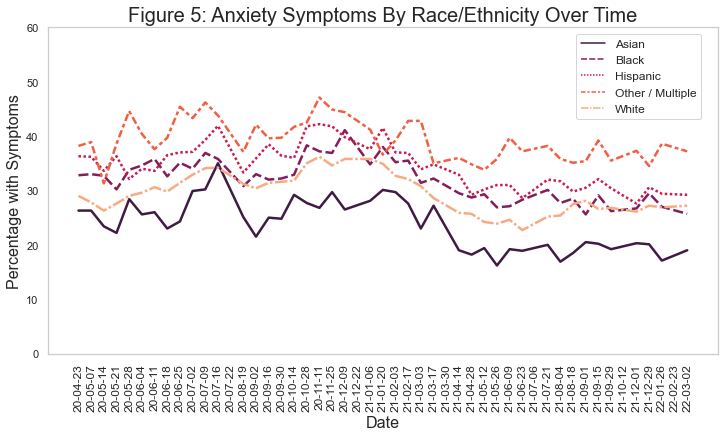

In [11]:
#####################################################################################################################
# Figures 5 and 6: By Race and Ethnicity
#####################################################################################################################

### Anxiety Symptoms by Race/Ethnicity in All of the United States

anxiety_race = cdc[(cdc.Indicator=='Symptoms of Anxiety Disorder') & (cdc.Group=='By Race/Hispanic ethnicity')]

def recode_race(series):
    if series=='Hispanic or Latino':
        return 'Hispanic'
    elif series =='Non-Hispanic Asian, single race':
        return 'Asian'
    elif series =='Non-Hispanic Black, single race':
        return 'Black'
    elif series =='Non-Hispanic White, single race':
        return 'White'
    elif series =='Non-Hispanic, other races and multiple races':
        return 'Other / Multiple'

anxiety_race['Subgroup']=anxiety_race['Subgroup'].apply(recode_race)

# Group by Race/Ethnicity Subgroup and summarize

anxiety_race_grouped = anxiety_race.groupby(by='Subgroup')
anxiety_race_grouped.Value.describe()

### Depression Symptoms by Race/Ethnicity in All of the United States

depression_race = cdc[(cdc.Indicator=='Symptoms of Depressive Disorder') & (cdc.Group=='By Race/Hispanic ethnicity')]

depression_race['Subgroup']=depression_race['Subgroup'].apply(recode_race)


# Group by Race/Ethnicity Subgroup and summarize

depression_race_grouped = depression_race.groupby(by='Subgroup')
depression_race_grouped.Value.describe()

#### Show anxiety levels over time by Race/Ethnicity 

anxiety_race = anxiety_race.sort_values(by='Time Period Start Date')

anxiety_race_time = anxiety_race[['Value', 'Time Period Start Date', 'Subgroup']]

anxiety_race_time = anxiety_race_time.pivot(index='Time Period Start Date',columns='Subgroup',values='Value')

sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()
sns.lineplot(data=anxiety_race_time, palette="rocket", linewidth=2.5)
plt.title("Figure 5: Anxiety Symptoms By Race/Ethnicity Over Time", fontsize = 20)
plt.xlabel("Date", fontsize = 16) 
plt.ylabel("Percentage with Symptoms", fontsize = 16)
plt.legend(loc='center left', bbox_to_anchor=(.78, 0.85),fontsize=12)
plt.xticks(rotation=90,size = 12)
ax.set_ylim(0, 60)

plt.show()


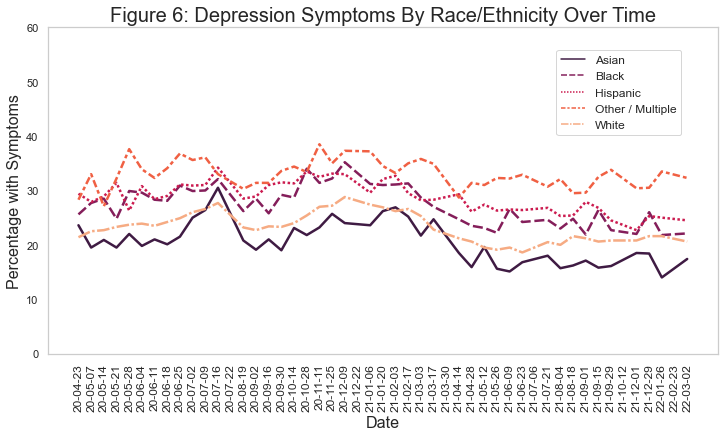

In [12]:
#### Show depression levels over time by Race/Ethnicity

depression_race = depression_race.sort_values(by='Time Period Start Date')

depression_race_time = depression_race[['Value', 'Time Period Start Date', 'Subgroup']]

depression_race_time = depression_race_time.pivot(index='Time Period Start Date',columns='Subgroup',values='Value')

sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()
sns.lineplot(data=depression_race_time, palette="rocket", linewidth=2.5)
plt.title("Figure 6: Depression Symptoms By Race/Ethnicity Over Time", fontsize = 20)
plt.xlabel("Date", fontsize = 16) 
plt.ylabel("Percentage with Symptoms", fontsize = 16)
plt.legend(loc='center left', bbox_to_anchor=(.75, 0.8),fontsize=12)
plt.xticks(rotation=90,size = 12)
ax.set_ylim(0, 60)

plt.show()


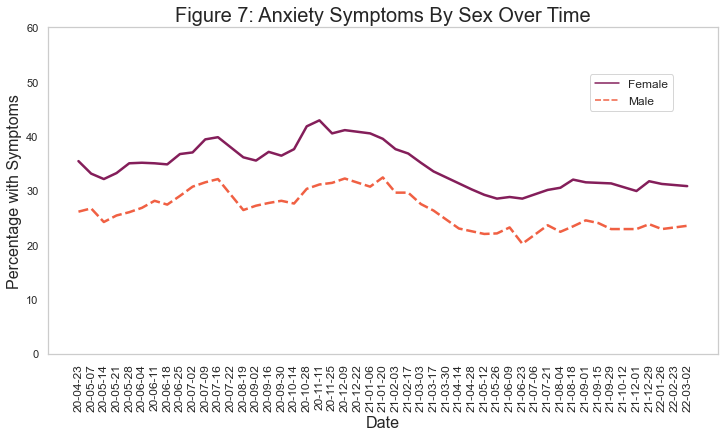

In [13]:
#####################################################################################################################
# Figures 7 and 8: By Sex
#####################################################################################################################

### Anxiety Symptoms by Sex in All of the United States

anxiety_sex = cdc[(cdc.Indicator=='Symptoms of Anxiety Disorder') & (cdc.Group=='By Sex')]

# Group bySex Subgroup and summarize

anxiety_sex_grouped = anxiety_sex.groupby(by='Subgroup')
anxiety_sex_grouped.Value.describe()

### Depression Symptoms by Sex in All of the United States

depression_sex = cdc[(cdc.Indicator=='Symptoms of Depressive Disorder') & (cdc.Group=='By Sex')]

# Group by Sex Subgroup and summarize

depression_sex_grouped = depression_sex.groupby(by='Subgroup')
depression_sex_grouped.Value.describe()

#### Show anxiety levels over time by Sex

anxiety_sex = anxiety_sex.sort_values(by='Time Period Start Date')

anxiety_sex_time = anxiety_sex[['Value', 'Time Period Start Date', 'Subgroup']]

anxiety_sex_time = anxiety_sex_time.pivot(index='Time Period Start Date',columns='Subgroup',values='Value')

sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()
sns.lineplot(data=anxiety_sex_time, palette="rocket", linewidth=2.5)
plt.title("Figure 7: Anxiety Symptoms By Sex Over Time", fontsize = 20)
plt.xlabel("Date", fontsize = 16) 
plt.ylabel("Percentage with Symptoms", fontsize = 16)
plt.legend(loc='center left', bbox_to_anchor=(.8, .8),fontsize=12)
plt.xticks(rotation=90,size = 12)
ax.set_ylim(0, 60)

plt.show()

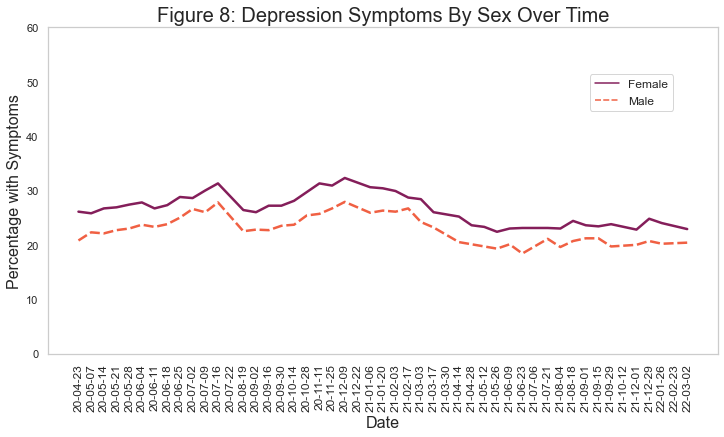

In [14]:
#### Show depression levels over time by Sex

depression_sex = depression_sex.sort_values(by='Time Period Start Date')

depression_sex_time = depression_sex[['Value', 'Time Period Start Date', 'Subgroup']]

depression_sex_time = depression_sex_time.pivot(index='Time Period Start Date',columns='Subgroup',values='Value')

sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()
sns.lineplot(data=depression_sex_time, palette="rocket", linewidth=2.5)
plt.title("Figure 8: Depression Symptoms By Sex Over Time", fontsize = 20)
plt.xlabel("Date", fontsize = 16) 
plt.ylabel("Percentage with Symptoms", fontsize = 16)
plt.legend(loc='center left', bbox_to_anchor=(.8, .8),fontsize=12)
plt.xticks(rotation=90,size = 12)
ax.set_ylim(0, 60)

plt.show()